In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
%matplotlib inline

In [2]:
milk=pd.read_csv('C:/Users/Dmwin/Downloads/Jupiter/datasets/milknew.csv')

In [3]:
milk.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


Taste = 0 --> Bad 

Taste = 1 --> Good

Odor = 0 --> bad smell

Odor = 1 --> good smell

Fat = 0 --> low fat

Fat = 1 --> high fat

Turbidity = 0 --> low cloudiness milk

Turbidity = 1 --> high cloudiness milk

Colour ranges from 240 to 255 on the hexadecimal scale.

In [4]:
milk['Grade'].unique()
milk['Grade'].value_counts()

Grade
low       429
medium    374
high      256
Name: count, dtype: int64

In [5]:
label_milk=LabelEncoder()

In [6]:
milk['Grade']=label_milk.fit_transform(milk['Grade'])

In [7]:
milk['Grade'].value_counts()

Grade
1    429
2    374
0    256
Name: count, dtype: int64

In [45]:
milk.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


<Axes: xlabel='milky', ylabel='count'>

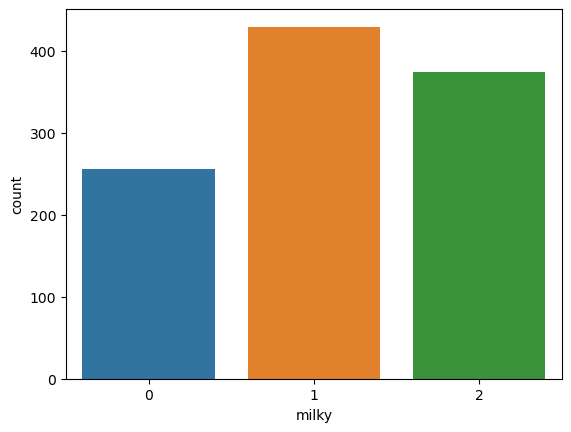

In [8]:
df=pd.DataFrame({'milky': milk['Grade']})
sns.countplot(data=df, x='milky')

In [46]:
X= milk.drop('Grade', axis=1)
y= milk['Grade']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [48]:
sc = StandardScaler()

In [49]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [50]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [51]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.99      0.99        78
           2       1.00      1.00      1.00        86

    accuracy                           1.00       212
   macro avg       0.99      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212



In [31]:
print(confusion_matrix(y_test, pred_rfc))

[[48  0  0]
 [ 1 77  0]
 [ 0  0 86]]


In [73]:
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        59
           1       1.00      0.98      0.99        84
           2       0.89      0.96      0.92        69

    accuracy                           0.95       212
   macro avg       0.95      0.94      0.94       212
weighted avg       0.95      0.95      0.95       212



In [84]:
Xnew=[[6.5,37,1,1,1,1,255]]
ynew = rfc.predict(Xnew)


In [85]:
ynew

array([1])

In [86]:
if ynew==0:
    qual="high"
elif ynew==1:
    qual="low"
else:
    qual="medium"

print('The milk has a', qual,'quality')

The milk has a low quality


<Axes: ylabel='count'>

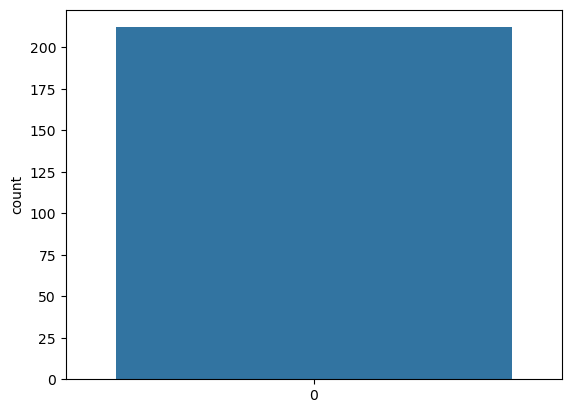

In [52]:
sns.countplot(pred_rfc)